# KNN算法

## 1、KNN基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 以肿瘤为例，自行设置一个简单的数据进行KNN算法的展示，0表示良性，1表示恶性

In [2]:
raw_data_x = [[3.393533211, 2.331273381],
             [3.110073483, 1.781539638],
             [1.343808831, 3.368360954],
             [3.582294042, 4.679179110],
             [2.280362439, 2.866990263],
             [7.423436942, 4.696522875],
             [5.745051997, 3.533989803],
             [9.172168622, 2.511101045],
             [7.792783481, 3.424088941],
             [7.93820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [4]:
x_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93820817, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

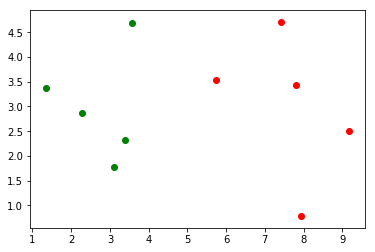

In [6]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = "green")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = "red")
plt.show()

#### 当输入一个点加入到图中-----此处x1相当于是输入样例

In [7]:
x1 = np.array([8.093607318, 3.365731514])

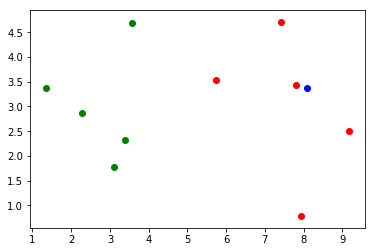

In [8]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = "green")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = "red")
plt.scatter(x1[0], x1[1], color ='b')
plt.show()

## 2、KNN的过程：判断输入的点属于哪个类

In [9]:
from math import sqrt
distances = []
for data in x_train:
    d = sqrt(np.sum((data - x1)**2))    #欧几里得距离计算公式
    distances.append(d)
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.578780772569163]

#### 上述使用的是for循环实现的欧几里得距离计算，也可以使用生成表达式形式，更为高效便捷

In [11]:
from math import sqrt
distances = [sqrt(np.sum((data - x1)**2)) for data in x_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.578780772569163]

#### 对上述进行排序，知道他们所在的位置，即索引值

In [14]:
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

#### 设定k-近邻算法（KNN）中的k值，根据k值筛选出离x1最近的k个位置

In [18]:
k = 6

#### 寻找这k个点对应的y坐标

In [19]:
topk_y = [y_train[i] for i in nearest[:k]]
topk_y

[1, 1, 1, 1, 1, 0]

#### 对最近邻的这些点进行投票，即数出每个类别对应的个数有几个，使用python自带的collections模块

In [20]:
from collections import Counter
votes = Counter(topk_y)
votes

Counter({1: 5, 0: 1})

#### 上述显示1有5票，0有1票，但是我们要的是得到票数最多的那个类别，因此使用Counter中的most_common,统计票数最多的几个类，这里我们只需统计一个类，故为1

In [21]:
votes.most_common(1)

[(1, 5)]

#### 可以看到票数最多的是1，对应的票数是5，但是我们只需要得到1，因此对这个输出值做些变化

In [24]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

## 3、使用函数的形式将算法进行封装（使用pycharm对KNN函数进行编写，为.py文件，然后在此处调用）

In [25]:
import numpy as np
import matplotlib.pyplot as plt
raw_data_x = [[3.393533211, 2.331273381],
             [3.110073483, 1.781539638],
             [1.343808831, 3.368360954],
             [3.582294042, 4.679179110],
             [2.280362439, 2.866990263],
             [7.423436942, 4.696522875],
             [5.745051997, 3.533989803],
             [9.172168622, 2.511101045],
             [7.792783481, 3.424088941],
             [7.93820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)
#输入样例
x1 = np.array([8.093607318, 3.365731514])

In [30]:
%run D:/soft/pycharm/MLtest/KNN/test.py

In [31]:
predict_y = KNN_classify(6, x_train, y_train, x1)
predict_y

1

### 总结：KNN是一个不需要训练过程的算法
### 其仅对训练数据集有记忆功能，不会从训练集中通过学习得到判别函数

### 附加知识点：如何将想要的外部图片加载进来显示

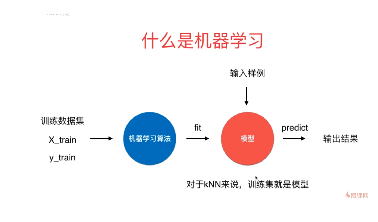

In [47]:
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/KNN.png")
plt.imshow(lean)
plt.axis('off') #关闭坐标轴
plt.show()

## 4、使用scikit-learn中的KNN算法

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
raw_data_x = [[3.393533211, 2.331273381],
             [3.110073483, 1.781539638],
             [1.343808831, 3.368360954],
             [3.582294042, 4.679179110],
             [2.280362439, 2.866990263],
             [7.423436942, 4.696522875],
             [5.745051997, 3.533989803],
             [9.172168622, 2.511101045],
             [7.792783481, 3.424088941],
             [7.93820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)
#输入样例
x1 = np.array([8.093607318, 3.365731514])

KNN_classifier = KNeighborsClassifier(n_neighbors = 6)  #定义KNN的k，即n_neighbors
KNN_classifier.fit(x_train, y_train)   #使用fit拟合训练的数据集
x1_predict = x1.reshape(1,-1)   #将x1变成矩阵
y1_predict = KNN_classifier.predict(x1_predict)
y1_predict[0]

1

In [53]:
x1_predict

array([[8.09360732, 3.36573151]])

## 5、重新整理我们的KNN代码（设计完整的代码，定义每个函数功能）

In [88]:
%run D:/soft/pycharm/MLtest/KNN_1/KNN.py

In [89]:
#输入样例
x = np.array([8.093607318, 3.365731514])
x_predict = x.reshape(1,-1)
KNN_clf = KNNClassifier(k = 6)

In [90]:
KNN_clf.fit(x_train, y_train)

In [92]:
y_predict = KNN_clf.predict(x_predict)
y_predict[0]

1

### 通过上面的方法，我们得到了结果，但是将这种方法用到真实数据集中吗，不知道这种方法是否可行，可能存在以下问题

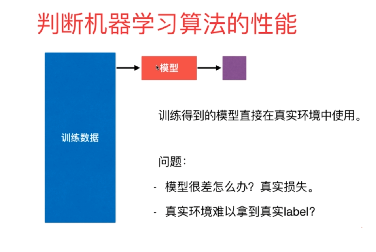

In [95]:
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/3.png")
plt.imshow(lean)
plt.axis('off') #关闭坐标轴
plt.show()

### 将所有的原始数据都去当做训练集是不恰当的，通常我们从原始数据抽取80%-70%作为训练数据，其他作为测试数据，如下所示

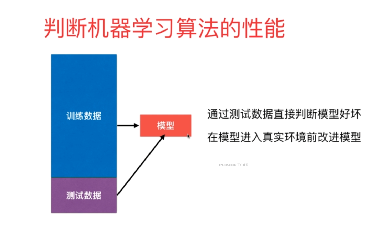

In [97]:
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/2.png")
plt.imshow(lean)
plt.axis('off') #关闭坐标轴
plt.show()

### 训练数据集和测试数据的切分

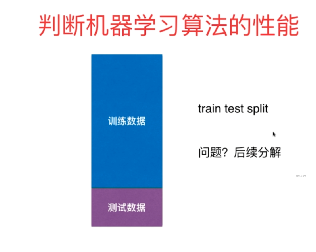

In [98]:
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/4.png")
plt.imshow(lean)
plt.axis('off') #关闭坐标轴
plt.show()

## 6、测试我们的算法

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets    
iris = datasets.load_iris()    #获得鸢尾花数据集
x = iris.data
y = iris.target
x.shape

(150, 4)

In [100]:
y.shape

(150,)

## 7、train_test_split 操作 （将原始数据集拆分成训练数据集和测试数据集）

In [101]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 对于拆分的操作，因为y对应的类别数据都是有序的，因此需要将x、y打乱，这样选取一定数据作为训练数据集才具有随机性
#### 然而在打乱的时候不能分开打乱，因为分开的话就会使得x、y数据不对应了。故借助numpy中random中的permutation对（假设数为100）数进行随机放置
#### 这些随机数是数据对应的索引值的乱序

In [102]:
shuffle_indexes = np.random.permutation(len(x))

In [104]:
shuffle_indexes

array([ 77,  82,  20,  84,  95,  62,  59, 122,   9,  88,  81,  67, 130,
        63, 132,  50, 117,  18,  27,  85,  32,  55,  14, 104, 125,  94,
        11, 129,  93,  71,   0,  45,   5,  65, 143, 142,  51,  30,  60,
        17,  61,  43, 121,  73,  28,  41, 120,  70, 135, 108,  87,  35,
        19,  42,  91,  69, 113,  74,  31,  79,  13, 118, 148,  22, 146,
        52,  48,  58,  47, 115, 126, 147, 145,  16, 109, 114,  40,  21,
         3, 111,  34, 136, 124,   1, 140, 103,  76,  10,  80, 119,  49,
        89, 149, 133,  68,   8, 106,  83, 102,  26,  64,  23,  75,  46,
       128, 123, 116,  90,  56,  86, 139,  78, 141,  33, 131,   4,  97,
        25,  53,  72, 137,  24, 105,  99,  36,  38, 134,   7,  57,  66,
        44,  12,  54,   2,  15,  96, 112,  29, 101,  39,  37, 110, 127,
       138,  98, 100, 144, 107,  92,   6])

#### 接下来指定多少数据集作为测试集的比率

In [106]:
test_ratio = 0.2
test_size = int(len(x)*test_ratio)   #此处使用了强制转换int(),将浮点类型强制转换成int型
test_size

30

#### 为测试和训练数据集分配索引值

In [107]:
test_indexes = shuffle_indexes[:test_size]   #前30个索引值分配给测试数据集
train_indexes = shuffle_indexes[test_size:]  #后120个索引值个分配给训练数据集

#### 使用 Fancy Indexing 获得测试数据、训练数据

In [108]:
#训练数据集
x_train = x[train_indexes]
y_train = y[train_indexes]
#测试数据集
x_test = x[test_indexes]
y_test = y[test_indexes]

print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [109]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


#### 上述就完成了train_test_split的操作

#### 使用pycharm中自己编写的train_test_split

In [18]:
%run D:/soft/pycharm/MLtest/KNN_1/model_selection.py

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [23]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [24]:
%run D:/soft/pycharm/MLtest/KNN_1/KNN.py

In [25]:
my_knn_clf = KNNClassifier(k = 3)
my_knn_clf.fit(x_train, y_train)

### 预测结果

In [26]:
y_predict = my_knn_clf.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 0, 0])

In [29]:
y_test

array([0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 0, 0])

### 首先可以观察以上对比，也可以使用下面计算预测准确率

In [28]:
Accuracy = sum(y_predict == y_test) / len(y_test)
Accuracy

0.9666666666666667

## 8、sklearn中的train_test_split

In [30]:
from sklearn.model_selection import train_test_split
#此处random_state为随机种子，为了是在调用时防止数据发生变化，test_size不设置，默认为0.2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 666)
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [31]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


## 9、sklearn中的手写数据数据集的测试

### （1）、使用自己编写的KNN

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [33]:
digits = datasets.load_digits()

In [34]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [35]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [36]:
x = digits.data
x.shape

(1797, 64)

In [37]:
y = digits.target
y.shape

(1797,)

In [38]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [40]:
x[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [41]:
some_digit = x[666]
y[666]

0

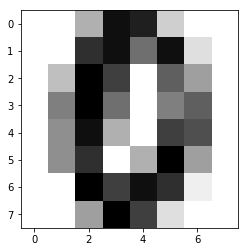

In [42]:
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [55]:
%run D:/soft/pycharm/MLtest/KNN_1/model_selection.py

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [69]:
%run D:/soft/pycharm/MLtest/KNN_1/KNN.py

In [63]:
my_knn_clf = KNNClassifier(k =3)
my_knn_clf.fit(x_train, y_train)
y_predict = my_knn_clf.predict(x_test)
y_predict

array([3, 1, 7, 5, 5, 4, 4, 6, 6, 7, 7, 0, 8, 0, 5, 3, 1, 7, 3, 2, 6, 1,
       5, 1, 1, 2, 6, 1, 0, 8, 1, 4, 3, 9, 3, 5, 5, 4, 9, 8, 7, 1, 8, 4,
       1, 1, 7, 4, 8, 2, 9, 8, 8, 0, 7, 9, 8, 7, 7, 7, 3, 9, 6, 7, 5, 3,
       3, 5, 2, 4, 5, 5, 8, 8, 8, 6, 7, 1, 7, 8, 6, 6, 1, 0, 7, 0, 3, 0,
       9, 8, 4, 5, 5, 4, 1, 5, 1, 2, 9, 5, 3, 9, 5, 2, 7, 3, 1, 0, 8, 3,
       6, 0, 7, 6, 0, 1, 9, 7, 0, 7, 1, 9, 6, 8, 3, 6, 2, 5, 4, 7, 0, 0,
       2, 5, 6, 5, 8, 3, 7, 2, 0, 0, 5, 0, 4, 4, 6, 7, 8, 2, 2, 8, 0, 6,
       5, 3, 4, 8, 2, 3, 8, 0, 3, 0, 5, 4, 6, 9, 8, 4, 8, 0, 8, 2, 7, 3,
       9, 4, 0, 4, 4, 3, 1, 4, 7, 8, 6, 5, 7, 0, 3, 9, 1, 7, 4, 3, 2, 0,
       4, 6, 7, 9, 6, 1, 3, 1, 2, 8, 2, 7, 0, 3, 5, 5, 3, 1, 6, 9, 7, 3,
       0, 2, 9, 5, 5, 5, 5, 6, 4, 7, 7, 6, 5, 8, 3, 3, 2, 5, 0, 9, 6, 3,
       6, 4, 3, 1, 3, 6, 9, 4, 0, 1, 2, 1, 7, 4, 4, 6, 3, 8, 2, 2, 7, 7,
       9, 7, 5, 3, 3, 6, 5, 1, 1, 4, 2, 1, 1, 0, 8, 4, 2, 9, 1, 3, 7, 8,
       1, 9, 6, 7, 0, 7, 7, 5, 2, 1, 1, 7, 2, 7, 7,

In [48]:
Accuracy = sum(y_predict == y_test) / len(y_test)
Accuracy

0.9860724233983287

In [64]:
%run D:/soft/pycharm/MLtest/KNN_1/metrics.py

In [65]:
accuracy_score(y_test,y_predict)

0.9860724233983287

In [66]:
my_knn_clf.score(x_test, y_test)

0.9860724233983287

### （2）、使用sklearn中的accuracy_score

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 666)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)

In [76]:
 knn_clf.fit(x_train, y_train)
y_predict = knn_clf.predict(x_test)

#### 1）、使用metrics中的accuracy_score计算准确度

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9888888888888889

#### 2）、使用KNN算法中的score函数计算准确度

In [78]:
knn_clf.score(x_test, y_test)

0.9888888888888889

## 10、超参数问题

#### 超参数：在算法运行前需要决定的参数，KNN算法中的k是典型的超参数
#### 模型参数：算法过程中学习的参数，KNN算法中没有模型参数

#### 寻找好的超参数方法：领域知识/经验数值/实验搜索

In [1]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
Y = digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 666)
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, Y_train)
knn_clf.score(X_test, Y_test)

0.9888888888888889

### (1)、寻找最好的K

In [2]:
best_score = 0.0   #初始化最好的得分
best_k = -1        #初始化最好的k
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, Y_train)
    score = knn_clf.score(X_test, Y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ", best_k)
print("best_score = ", best_score)

best_k =  4
best_score =  0.9916666666666667


### (2)、另外一个超参数：距离

In [4]:
best_method = ""
best_score = 0.0   
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights = method)
        knn_clf.fit(X_train, Y_train)
        score = knn_clf.score(X_test, Y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_method = ", best_method)

best_k =  4
best_score =  0.9916666666666667
best_method =  uniform


### 有哪些距离：欧拉距离、曼哈顿距离、明可夫斯基距离
### 更多的距离定义
   #### 向量空间余弦相似度
   #### 调整余弦相似度
   #### 皮尔森相关系数
   #### Jaccard相似系数

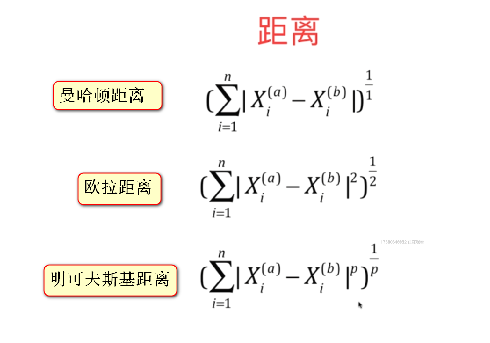

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/1.png")
plt.figure(figsize=(8, 7))
plt.imshow(lean)
plt.axis('off') #关闭坐标轴
plt.show()

### 可以看出欧拉距离和曼哈顿距离的格式是一样的，因此统一起来是明可夫斯基距离的特例。故从而得到了一个超参数：p
### 在sklearn中的KNeighborsClassifier文档中，其参数就包含了这个超参数p，因此我们可以对p进行求解
### p=1，就是曼哈顿距离；p=2，就是欧拉距离

### (3)、搜索明可夫斯基距离的p

In [27]:
%%time

best_p = -1
best_score = 0.0   
best_k = -1
for k in range(1, 11):
    for p_search in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights = "distance", p = p_search)
        knn_clf.fit(X_train, Y_train)
        score = knn_clf.score(X_test, Y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_p = ", best_p)

best_k =  3
best_score =  0.9888888888888889
best_p =  5
Wall time: 16.1 s


### 上述例子说明，对于KNN算法也是有很多超参数的，还有其他的超参数，具体参考官方文档，超参数之间存在依赖
### 这种搜索策略叫做------网格搜索

## 10.1 网格搜索---Grid Search

In [28]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
Y = digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 666)
from sklearn.neighbors import KNeighborsClassifier
sk_knn_clf = KNeighborsClassifier(n_neighbors=4,weights="uniform")
sk_knn_clf.fit(X_train, Y_train)
sk_knn_clf.score(X_test, Y_test)


0.9916666666666667

### 首先定义搜索的参数

In [29]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1, 6)]
    }
]

### 创建要进行网格搜索的机器学习算法KNN

In [30]:
knn_clf = KNeighborsClassifier()

### 调用sklearn中的网格搜索模块

In [31]:
from sklearn.model_selection import GridSearchCV

#### 创建GridSearchCV对应的实例对象，传入两个参数：第一个是对应的算法，第二个是对应的参数

In [32]:
grid_search = GridSearchCV(knn_clf, param_grid)

In [33]:
%%time
grid_search.fit(X_train, Y_train)

Wall time: 2min 8s


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### 返回KNeighborsClassifier中的最佳搜索参数

In [34]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

#### 搜索的具体准确度（得分）

In [35]:
grid_search.best_score_

0.9853862212943633

#### 对应于param_grid中搜索出来的最佳参数

In [36]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

#### 得到训练好的KNN分类器

In [37]:
knn_clf = grid_search.best_estimator_

#### 接下来就可以使用训练好的KNN分类器进行预测了

In [39]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       5, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 8, 7, 4, 2,
       8, 8, 7, 5, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [40]:
knn_clf.score(X_test, Y_test)

0.9833333333333333

### 重新进行网格搜索---设定详细的参数

In [41]:
%%time
# n_jobs:给计算机分配几个核进行并行处理，可以传入1,2,3,4,..，也可以传入-1，即用上计算机上的所有核,可以提高搜索速度，减少搜索时间
# verbose：显示搜索过程的输出，值越大，显示的搜索信息越多
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.1s


Wall time: 25.4 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   25.0s finished


## 11、数据归一化

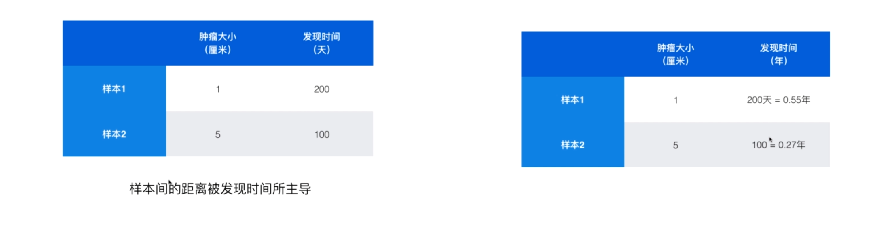

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/1.png")
lean1 = mpimg.imread("C:/Users/NWPU/Desktop/2.png")
plt.figure(figsize=(15, 12))
plt.subplot(1,2,1), plt.imshow(lean), plt.axis('off') #关闭坐标轴
plt.subplot(1,2,2), plt.imshow(lean1), plt.axis('off') #关闭坐标轴
plt.show()

### 解决方案：将所有的数据都映射到同一尺度

## 11.1、数据归一化的方法

### （1）最值归一化（normalization）

####  把所有数据映射到0-1之间 ，这种方法适用于数据分布有明显边界的情况：例如学生的分数、图像像素点的值
#### 但受outlier影响较大，例如：人的收入等

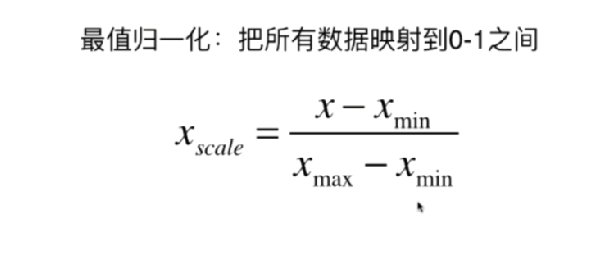

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/3.png")
plt.figure(figsize=(10, 8))
plt.imshow(lean), plt.axis('off') #关闭坐标轴
plt.show()

### 举例说明

In [51]:
x = np.random.randint(0, 100, size=100)  #定义一个向量，长度为100
x

array([70, 45, 32, 76, 43,  8, 73, 83, 38, 96, 69, 17, 71, 29, 20, 52, 60,
       27, 36,  9, 59, 99, 29, 62,  5, 69, 42, 89, 34, 54, 47, 23, 90, 41,
       87, 84,  7, 73, 98, 75, 46, 35,  4, 54, 70, 10, 25, 80, 38, 80, 90,
       87, 81, 55, 22,  8, 68, 40, 50, 29, 12, 76, 51,  9,  5, 96, 60, 18,
       74, 12, 66,  4,  3, 70, 75, 75, 10, 77, 10, 32, 32, 96, 81, 58, 65,
       50, 87, 67, 41, 32, 29, 51, 11, 68, 36, 74, 94, 12,  0, 75])

#### 求向量的最值归一化

In [52]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.70707071, 0.45454545, 0.32323232, 0.76767677, 0.43434343,
       0.08080808, 0.73737374, 0.83838384, 0.38383838, 0.96969697,
       0.6969697 , 0.17171717, 0.71717172, 0.29292929, 0.2020202 ,
       0.52525253, 0.60606061, 0.27272727, 0.36363636, 0.09090909,
       0.5959596 , 1.        , 0.29292929, 0.62626263, 0.05050505,
       0.6969697 , 0.42424242, 0.8989899 , 0.34343434, 0.54545455,
       0.47474747, 0.23232323, 0.90909091, 0.41414141, 0.87878788,
       0.84848485, 0.07070707, 0.73737374, 0.98989899, 0.75757576,
       0.46464646, 0.35353535, 0.04040404, 0.54545455, 0.70707071,
       0.1010101 , 0.25252525, 0.80808081, 0.38383838, 0.80808081,
       0.90909091, 0.87878788, 0.81818182, 0.55555556, 0.22222222,
       0.08080808, 0.68686869, 0.4040404 , 0.50505051, 0.29292929,
       0.12121212, 0.76767677, 0.51515152, 0.09090909, 0.05050505,
       0.96969697, 0.60606061, 0.18181818, 0.74747475, 0.12121212,
       0.66666667, 0.04040404, 0.03030303, 0.70707071, 0.75757

#### 求矩阵的最值归一化

In [57]:
x1 = np.random.randint(0, 100, (10, 2))
x1 = np.array(x1, dtype=float)   #强制将int型转换成float型
x1

array([[52., 21.],
       [67., 91.],
       [16., 72.],
       [72., 56.],
       [48., 88.],
       [18., 88.],
       [14., 43.],
       [48., 60.],
       [88., 55.],
       [71., 99.]])

In [65]:
x2 = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
x2

array([[0.44705882, 0.08235294],
       [0.62352941, 0.90588235],
       [0.02352941, 0.68235294],
       [0.68235294, 0.49411765],
       [0.4       , 0.87058824],
       [0.04705882, 0.87058824],
       [0.        , 0.34117647],
       [0.4       , 0.54117647],
       [0.87058824, 0.48235294],
       [0.67058824, 1.        ]])

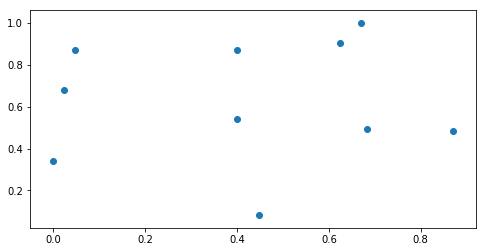

In [66]:
plt.scatter(x2[:, 0], x2[:, 1])
plt.show()

In [68]:
np.mean(x2[:, 0])  #第0列的均值

0.41647058823529415

In [69]:
np.std(x2[:, 0])  #第0列的方差

0.2915748908171231

### （2）均值方差归一化（standardization）

#### 均值方差归一化：把所有数据归一到均值为0方差为1的分布中
#### 数据分布没有明显的边界，有可能存在极端数据值


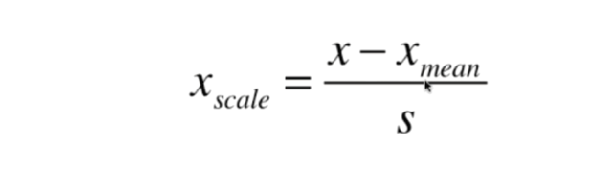

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/4.png")
plt.figure(figsize=(10, 8))
plt.imshow(lean), plt.axis('off') #关闭坐标轴
plt.show()

#### 举例说明

In [71]:
x3 = np.random.randint(0, 100, (10, 2))
x3 = np.array(x3, dtype=float)
x3

array([[82., 70.],
       [73., 85.],
       [46., 29.],
       [36., 82.],
       [21., 51.],
       [48., 84.],
       [59., 46.],
       [48.,  1.],
       [ 3., 87.],
       [76., 92.]])

#### 求解矩阵数据的均值方差归一化

In [72]:
x4 = (x3 - np.mean(x3)) / np.std(x3)
x4

array([[ 0.96188513,  0.51879025],
       [ 0.62956397,  1.07265885],
       [-0.3673995 , -0.99511725],
       [-0.73664523,  0.96188513],
       [-1.29051383, -0.18277664],
       [-0.29355036,  1.03573428],
       [ 0.11261995, -0.3673995 ],
       [-0.29355036, -2.0290053 ],
       [-1.95515615,  1.146508  ],
       [ 0.74033769,  1.33113086]])

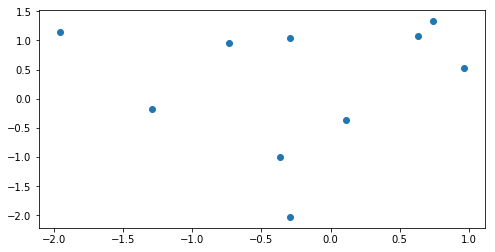

In [73]:
plt.scatter(x4[:, 0], x4[:, 1])
plt.show()

#### 此组数据的范围并没有在0到1之间，我们看下其均值方差

In [74]:
np.mean(x4[:, 0])

-0.24924086885237706

In [75]:
np.std(x4[:, 0])

0.8717327906023681

In [76]:
np.mean(x4[:, 1])

0.24924086885237678

In [77]:
np.std(x4[:, 1])

1.0563332430516577

#### 从以上均值和方差来看，可以看出均值偏向于0，方差偏向于1

## 11.2、scikit-learn中的Scaler类

### (1)对训练数据集和测试数据集进行归一化

#### 首先需要对训练数据集进行归一化：mean_train，std_train，然后利用测试数据集均值和方差对测试数据集进行归一化：(x_test - mean_train) / std_train

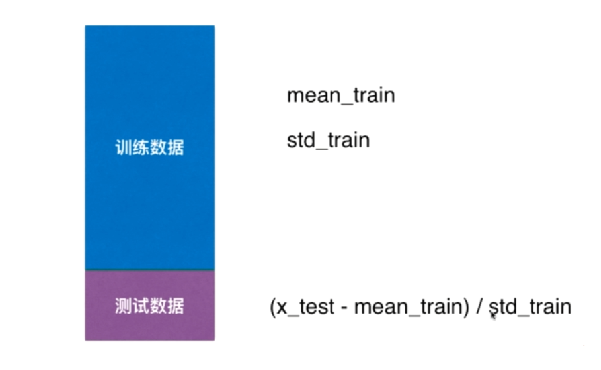

In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/5.png")
plt.figure(figsize = (10,8))
plt.imshow(lean), plt.axis('off')
plt.show()

#### 这样做的原因：测试数据是模拟真实环境，真实环境很有可能无法得到所有测试数据的均值和方差，对数据的归一化也是算法的一部分

#### 对于后期测试的所有数据，都要使用上述方法进行归一化（这里是均值方差归一化），从而测试训练好分类器的准确度

### 因此我们需要保存训练数据集得到的均值和方差

### （2）scikit-learn中的数据归一化-----Scaler类

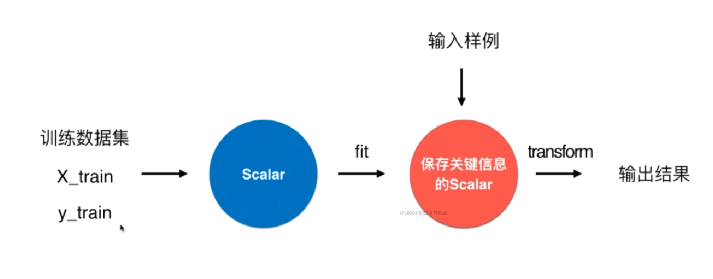

In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/6.png")
plt.figure(figsize = (12,10))
plt.imshow(lean), plt.axis('off')
plt.show()

###  使用鸢尾花数据集进行举例说明

In [97]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 666)

### scikit-learn中的StandardScaler

In [99]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()  #实例化
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
standardScaler.mean_   #均值

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [101]:
standardScaler.scale_  #方差

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

#### 使用transform对数据（训练数据集和测试数据集）进行归一化处理

In [102]:
X_train = standardScaler.transform(X_train)
X_train

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746],
       [ 1.80923518, -0.41404933,  1.46959958,  0.83631808],
       [ 0.69839152,  0.2665797 ,  0.90236912,  1.49918578],
       [ 0.20468323,  0.72033239,  0.44858475,  0.571171  ],
       [-0.78273335, -0.86780201,  0.10824648,  0.30602392],
       [-0.53587921,  1.40096142, -1.25310662, -1.28485856],
       [-0.65930628,  1.40096142, -1.25310662, -1.28485856],
       [-1.0295875 ,  0.

In [103]:
X_test = standardScaler.transform(X_test)
X_test

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856],
       [-0.41245214, -1.3215547 ,  0.16496953,  0.17345038],
       [-0.16559799, -0.64092567,  0.44858475,  0.17345038],
       [ 0.82181859, -0.18717298,  0.84564608,  1.10146516],
       [ 0.57496445, -1.77530738,  0.39186171,  0.17345038],
       [-0.41245214, -1.09467835,  0.39186171,  0.04087684],
       [ 1.06867274,  0.03970336,  0.39186171,  0.30602392],
       [-1.64672287, -1.77530738, -1.36655271, -1.15228502],
       [-1.27644165,  0.03970336, -1.19638358, -1.28485856],
       [-0.53587921,  0.72033239, -1.25310662, -1.01971148],
       [ 1.68580811,  1.17408507,  1.35615349,  1.76433286],
       [-0.04217092, -0.86780201,  0.22169257, -0.22427024],
       [-1.52329579,  1.

### 使用KNN训练测试这些数据

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)

#### 训练

In [107]:
knn_clf.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### 测试（检测测试数据的准确度）

In [108]:
knn_clf.score(X_test, Y_test)

1.0

## 12、KNN总结

### （1）解决的问题

#### 解决分类问题，解决多分类问题，思想简单，效果强大
#### 可以解决回归问题：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

### (2）最大的缺点：效率低下

#### 如果训练集有m个样本，n个特征，则预测每一个新的数据，需要O(m*n)

#### 1）优化：使用树结构：KD-Tree，Ball-Tree， 但是这样仍会出现效率低下的问题

### （3）缺点二：高度数据相关

#### 对数据的outlier影响较大，比如在预测样本旁，有一两个，两三个数据的outlier出错，则会影响分类的准确度，使得准确度大大下降

### （4）缺点三：预测结果不具有可解释性

### （5）维数灾难

#### 随着维数的增加，“看似相近”的两个点之间的距离越来越大
#### 解决方法：降维---PCA

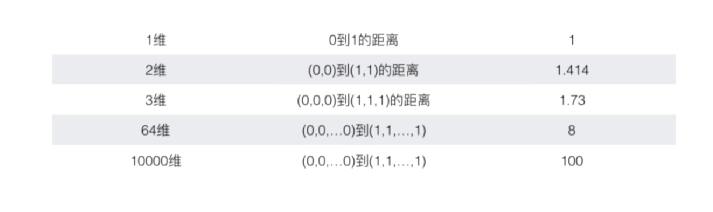

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/1.png")
plt.figure(figsize = (12,10))
plt.imshow(lean), plt.axis('off')
plt.show()

## 13、机器学习算法训练测试流程总结

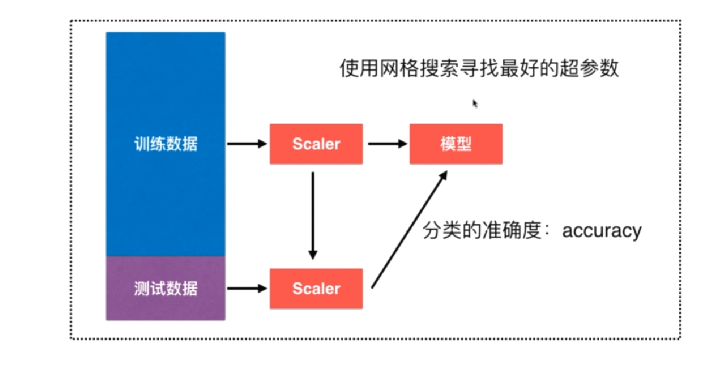

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
lean = mpimg.imread("C:/Users/NWPU/Desktop/2.png")
plt.figure(figsize = (12,10))
plt.imshow(lean), plt.axis('off')
plt.show()

#### 从一个完整的数据集出发，将数据集分成训练数据集和测试数据集，接着进行数据的归一化（Scaler），将归一化后的进行训练，得到最终的模型，
#### 对于测试数据集，同样使用Scaler进行数据的归一化，然后送进训练好的模型，来预测分类的准确度，这样就得到了该模型的性能好坏
#### 当然，在训练模型过程中，就已经固定好了超参数。为了得到更好的超参数，使用网格搜索的方法得到最好的超参数，进而得到一个最好的模型。